##### Läser in data från Excelfilen
I den här delen hämtas data från Excelfilen.    
Endast data från ett av bladen (Tabell 1B) ska användas. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Läser in Excelfilen för att se vilka sheets/blad som finns i filen
sheets = pd.ExcelFile("data/betyg_o_prov_riksnivå (1).xlsx").sheet_names
print(sheets)  

['Tabell 1A', 'Tabell 1B', 'Definitioner']


In [4]:
df = pd.read_excel("data/betyg_o_prov_riksnivå (1).xlsx", sheet_name = "Tabell 1B", header= 7) 
df.head(7)
type(df)

pandas.core.frame.DataFrame

##### Bearbetning av datan 
Ändrar namn på kolumnerna och skapar nya dataframes, som enbart innehåller information som är nödvändiga för uppgifterna

In [5]:
#Ändrar namn på kolumnerna, så jag ser vilken data som kolumnerna innehåller. 

df.rename(columns = {
    "Unnamed: 0": "Läsår", 
    "Totalt": "Meritvärde genomsnitt 16 ämnen: Totalt",
    "Flickor": "Meritvärde genomsnitt 16 ämnen: Flickor",
    "Pojkar": "Meritvärde genomsnitt 16 ämnen: Pojkar",
    "Totalt.1": "Meritvärde genomsnitt 17 ämnen: Totalt",
    "Flickor.1": "Meritvärde genomsnitt 17 ämnen: Flickor",
    "Pojkar.1": "Meritvärde genomsnitt 17 ämnen: Pojkar",
    "Totalt.2": "Andel (%) som saknar godkänt betyg: Totalt",
    "Flickor.2": "Andel (%) som saknar godkänt betyg: Flickor",
    "Pojkar.2": "Andel (%) som saknar godkänt betyg: Pojkar"
}, inplace=True)

# Kontrollera resultatet
df.head()





,Läsår,Meritvärde genomsnitt 16 ämnen: Totalt,Meritvärde genomsnitt 16 ämnen: Flickor,Meritvärde genomsnitt 16 ämnen: Pojkar,Meritvärde genomsnitt 17 ämnen: Totalt,Meritvärde genomsnitt 17 ämnen: Flickor,Meritvärde genomsnitt 17 ämnen: Pojkar,Andel (%) som saknar godkänt betyg: Totalt,Andel (%) som saknar godkänt betyg: Flickor,Andel (%) som saknar godkänt betyg: Pojkar
0,2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
1,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
3,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
4,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0


##### Data och visualisering för uppgift 2 a

In [6]:
#Skapar en ny datafram som enbart innehåller kolumnerna för elever som saknar betyg. 
df_saknar_betyg = df[["Läsår", "Andel (%) som saknar godkänt betyg: Totalt","Andel (%) som saknar godkänt betyg: Flickor", "Andel (%) som saknar godkänt betyg: Pojkar" ]]

#Slicar raderna, så jag enbart får med de rader som innehåller läsår.
new_df = df_saknar_betyg.iloc[:4, :]


In [7]:
new_df

,Läsår,Andel (%) som saknar godkänt betyg: Totalt,Andel (%) som saknar godkänt betyg: Flickor,Andel (%) som saknar godkänt betyg: Pojkar
0,2018/19,24.5,21.7,27.2
1,2019/20,23.9,21.4,26.3
2,2020/21,23.9,21.9,25.9
3,2021/22,25.9,24.2,27.5


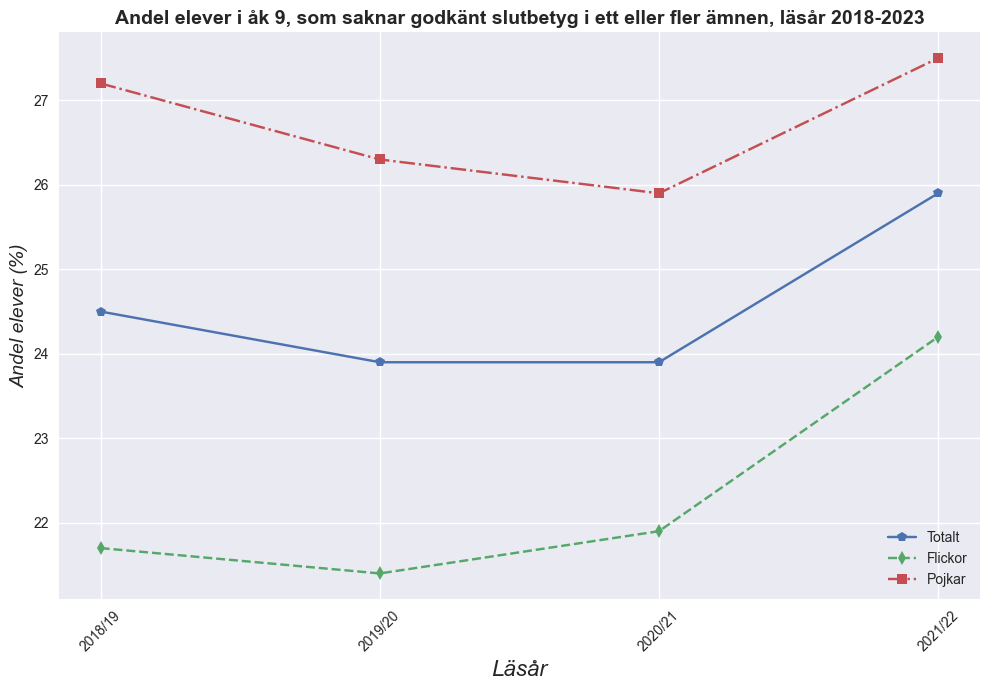

In [9]:
#Skapar en plot
x = new_df["Läsår"]
y = new_df["Andel (%) som saknar godkänt betyg: Totalt"]
y1 = new_df["Andel (%) som saknar godkänt betyg: Flickor"]
y2 = new_df["Andel (%) som saknar godkänt betyg: Pojkar"]

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 7))

#Plottar varje linje separat
plt.plot(x, y, marker='p', linestyle='-', label="Totalt")
plt.plot(x, y1, marker='d', linestyle='--', label="Flickor")
plt.plot(x, y2, marker='s', linestyle='-.', label="Pojkar")

#Anpassningar diagrammet
plt.xlabel("Läsår", fontsize = 16,  fontstyle="italic")  
plt.ylabel("Andel elever (%)", fontsize = 14,  fontstyle="italic")  
plt.title("Andel elever i åk 9, som saknar godkänt slutbetyg i ett eller fler ämnen, läsår 2018-2023", fontsize= 14, fontweight="bold")  
plt.xticks(rotation=45)  
plt.legend() 
plt.grid(True)  
plt.tight_layout()  

plt.show()  

##### Data och visualisering för uppgift 2 b

In [ ]:
#  "Totalt": ,
#     ,
#     ,

In [16]:
#Skapar en ny datafram som enbart innehåller kolumnerna för elever som saknar betyg. 
df_meritvärde = df[["Läsår", "Meritvärde genomsnitt 16 ämnen: Totalt","Meritvärde genomsnitt 16 ämnen: Flickor", "Meritvärde genomsnitt 16 ämnen: Pojkar" ]]

#Slicar raderna, så jag enbart får med de rader som innehåller läsår.
df_meritvärde_new = df_meritvärde.iloc[:4, :]

df_meritvärde_new 


,Läsår,Meritvärde genomsnitt 16 ämnen: Totalt,Meritvärde genomsnitt 16 ämnen: Flickor,Meritvärde genomsnitt 16 ämnen: Pojkar
0,2018/19,221.7,234.3,209.8
1,2019/20,222.9,235.7,210.9
2,2020/21,223.9,235.4,212.9
3,2021/22,221.2,231.6,211.4


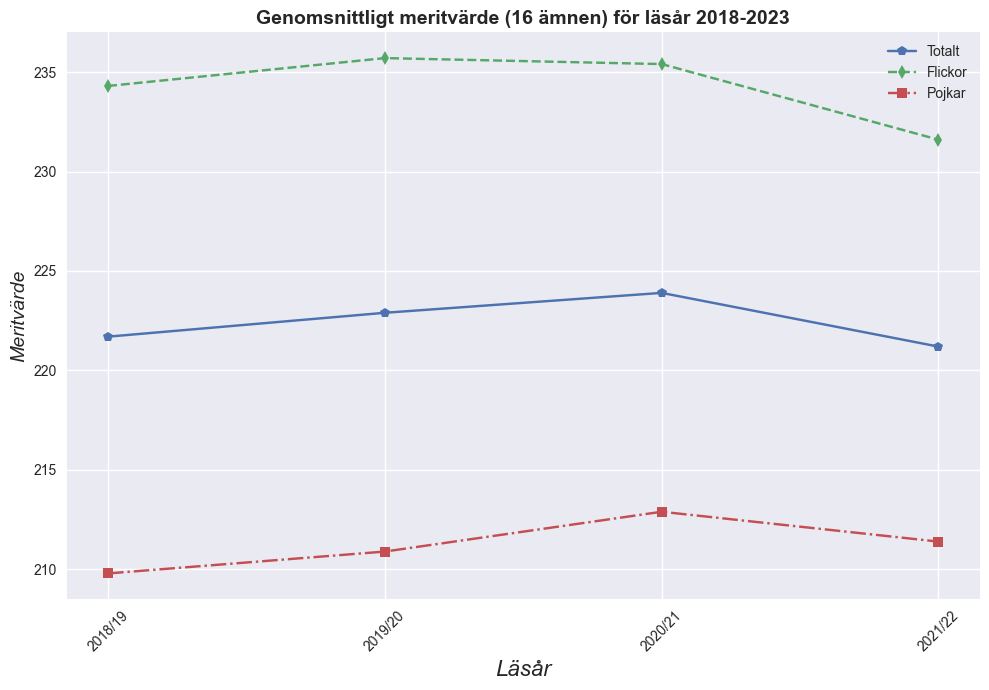

In [22]:
#Skapar en plot
x = df_meritvärde_new["Läsår"]
y = df_meritvärde_new["Meritvärde genomsnitt 16 ämnen: Totalt"]
y1 = df_meritvärde_new["Meritvärde genomsnitt 16 ämnen: Flickor"]
y2 = df_meritvärde_new["Meritvärde genomsnitt 16 ämnen: Pojkar"]

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 7))

#Plottar varje linje separat
plt.plot(x, y, marker='p', linestyle='-', label="Totalt")
plt.plot(x, y1, marker='d', linestyle='--', label="Flickor")
plt.plot(x, y2, marker='s', linestyle='-.', label="Pojkar")

#Anpassningar diagrammet
plt.xlabel("Läsår", fontsize = 16,  fontstyle="italic")  
plt.ylabel("Meritvärde", fontsize = 14,  fontstyle="italic")  
plt.title("Genomsnittligt meritvärde (16 ämnen) för läsår 2018-2023", fontsize= 14, fontweight="bold")  
plt.xticks(rotation=45)  
plt.legend() 
plt.grid(True)  
plt.tight_layout()  

plt.show()  